<a href="https://colab.research.google.com/github/sushkbura/Springboard/blob/main/SushBura_MLE_MiniProject_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")
!ls -lah /content/drive/MyDrive/Colab\ Notebooks/
!find /content/drive -maxdepth 6 -name "yellow_tripdata_2022-01.parquet"

Mounted at /content/drive
total 11K
-rw------- 1 root root 3.1K Jul 15 02:47  ColabIntroTutorial.ipynb
-rw------- 1 root root 2.9K Jul 15 02:47 'Copy of ColabIntroTutorial.ipynb'
drwx------ 2 root root 4.0K Aug  1 16:44  Springboard_Projects
/content/drive/MyDrive/Colab Notebooks/Springboard_Projects/yellow_tripdata_2022-01.parquet


In [4]:
# Load parquet file into a Pandas DataFrame
path = "/content/drive/MyDrive/Colab Notebooks/Springboard_Projects/yellow_tripdata_2022-01.parquet"
df = pd.read_parquet(path, engine='pyarrow')

In [5]:
# Display the first few rows of the dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [6]:
# Display the shape of the dataset
df.shape

(2463931, 19)

In [7]:
# Check for missing values
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]

print(null_counts)

passenger_count         71503
RatecodeID              71503
store_and_fwd_flag      71503
congestion_surcharge    71503
airport_fee             71503
dtype: int64


In [9]:
# Summary statistics of the dataset
summary = df.describe(include='all')
summary

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2392428,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2337496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,NaN,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,NaN,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,NaN,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,NaN,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,NaN,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00


In [10]:
#Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.
df[df["fare_amount"] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
154,2,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,7.38,1.0,N,132,265,4,-21.00,-0.5,-0.5,0.00,0.00,-0.3,-23.55,0.0,-1.25
521,2,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,5.14,1.0,N,152,48,4,-17.00,-0.5,-0.5,0.00,0.00,-0.3,-20.80,-2.5,0.00
523,2,2022-01-01 00:59:33,2022-01-01 01:14:09,4.0,5.37,5.0,N,50,265,2,-75.00,0.0,0.0,0.00,0.00,-0.3,-77.80,-2.5,0.00
580,2,2022-01-01 00:16:58,2022-01-01 00:19:41,1.0,0.46,1.0,N,90,234,2,-4.00,-0.5,-0.5,0.00,0.00,-0.3,-7.80,-2.5,0.00
714,2,2022-01-01 00:29:12,2022-01-01 00:40:29,1.0,3.13,1.0,N,13,246,4,-12.00,-0.5,-0.5,0.00,0.00,-0.3,-15.80,-2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454848,2,2022-01-29 19:26:00,2022-01-29 19:27:00,NaN,0.15,NaN,None,114,114,0,-25.81,0.0,0.5,3.38,0.00,0.3,-19.13,NaN,NaN
2455887,2,2022-01-29 22:42:42,2022-01-29 22:44:01,NaN,0.17,NaN,None,48,48,0,-26.30,0.0,0.5,3.46,0.00,0.3,-19.54,NaN,NaN
2458027,2,2022-01-30 12:27:00,2022-01-30 13:12:00,NaN,30.18,NaN,None,262,1,0,-159.50,0.0,0.0,13.12,13.75,0.3,-132.33,NaN,NaN
2458807,2,2022-01-30 14:11:00,2022-01-30 14:16:00,NaN,0.72,NaN,None,42,41,0,-5.17,0.0,0.5,0.00,13.75,0.3,9.38,NaN,NaN


In [15]:
# -- Finding one anomoly --

# Filter the DataFrame
neg_fares = df[df['fare_amount'] < 0]

# Loop through columns and print value counts
for col in neg_fares.columns:
    print(f"\n--- Value counts for: {col} ---")
    print(neg_fares[col].value_counts(dropna=False).head(10))


--- Value counts for: VendorID ---
VendorID
2    12731
6        2
Name: count, dtype: int64

--- Value counts for: tpep_pickup_datetime ---
tpep_pickup_datetime
2022-01-22 14:51:13    2
2022-01-28 15:08:44    2
2022-01-15 15:30:03    2
2022-01-05 21:29:17    2
2022-01-05 19:52:52    2
2022-01-21 18:39:08    2
2022-01-15 20:01:23    2
2022-01-14 09:18:54    2
2022-01-07 19:24:14    2
2022-01-15 22:16:22    2
Name: count, dtype: int64

--- Value counts for: tpep_dropoff_datetime ---
tpep_dropoff_datetime
2022-01-19 21:23:02    2
2022-01-06 19:44:35    2
2022-01-21 08:06:05    2
2022-01-02 16:06:57    2
2022-01-11 19:52:50    2
2022-01-30 14:25:49    2
2022-01-23 03:50:53    2
2022-01-12 12:28:21    2
2022-01-27 17:25:58    2
2022-01-10 11:15:29    2
Name: count, dtype: int64

--- Value counts for: passenger_count ---
passenger_count
1.0    10020
2.0     1849
3.0      457
4.0      187
5.0      108
6.0       67
NaN       40
0.0        5
Name: count, dtype: int64

--- Value counts for: tri

In [16]:
# -- explanation of the hypothesis around negative fare_amount values --

#Vendor 2 (Curb Mobility) is most likely recording negative fare amounts to show refunds, disputes, or canceled trips. This might be how their system is set up to log such cases.
#Vendor 6 (Myle Technologies) has only 2 trips with negative fares, which could be test data or rare cases.

In [17]:
# Drop rows with missing values.
df = df.dropna()

In [18]:
df.dtypes

,0
VendorID,int64
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,int64


In [19]:
# Create a new column for trip duration in minutes
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['trip_duration_minutes'] = df['trip_duration_minutes'].round(2)

In [20]:
# Create new columns for pickup hour and day of week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name()

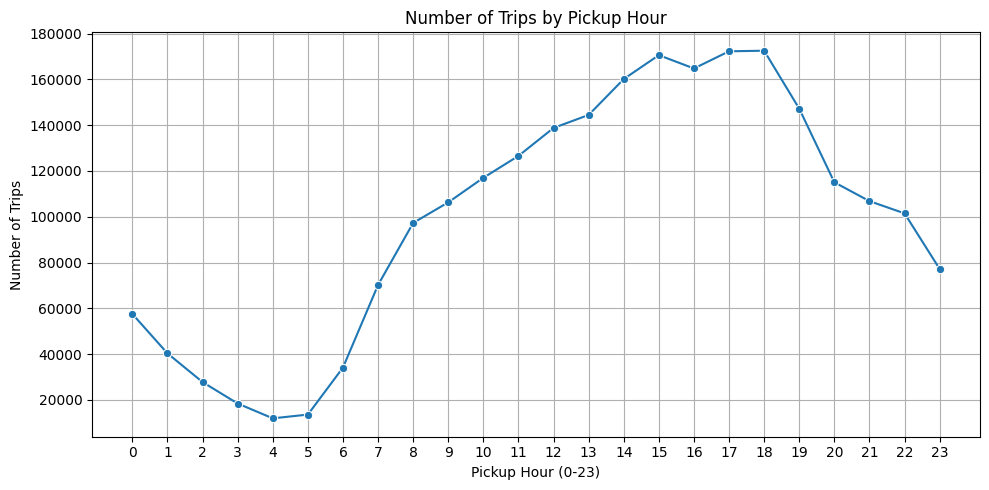

In [23]:
# Create a lineplot displaying the number of trips by pickup hour

# Group by pickup_hour and count number of trips
hourly_trips = df.groupby('pickup_hour').size().reset_index(name='trip_count')

# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_trips, x='pickup_hour', y='trip_count', marker='o')

# Add labels and title
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Pickup Hour (0-23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))  # Show all hours
plt.grid(True)
plt.tight_layout()
plt.show()

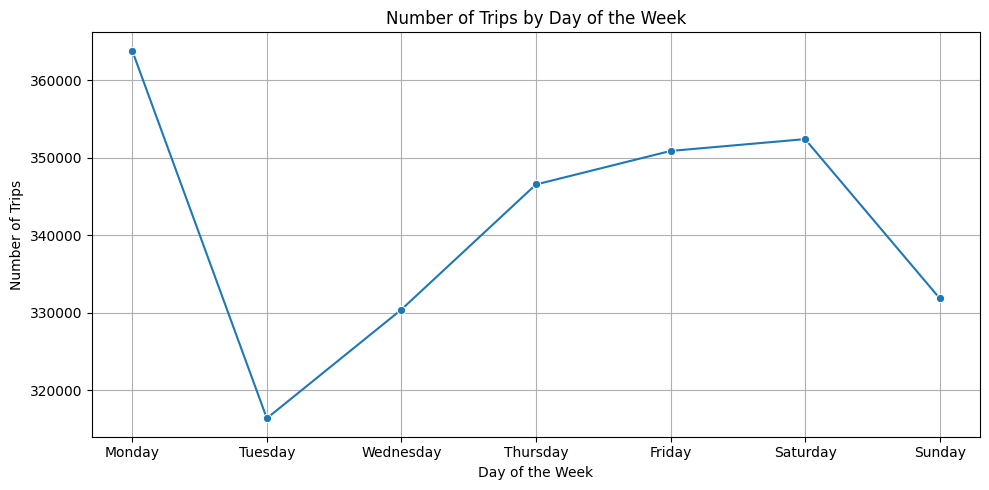

In [29]:
# Create a lineplot displaying the number of trips by pickup day

# Create ordered list of weekdays
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by pickup day and count number of trips
daily_trips = df['pickup_day_name'].value_counts().reindex(days_order).reset_index(name='trip_count')

# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_trips, x='pickup_day_name', y='trip_count', marker='o')

# Add labels and title
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


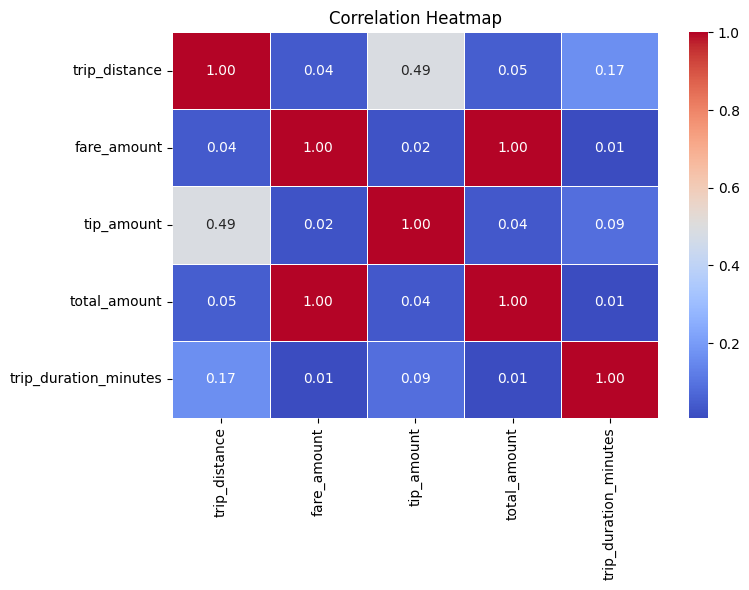

In [30]:
# Compute correlation matrix of numerical variables

# Select relevant numerical columns
cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_minutes']
corr_matrix = df[cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [31]:
# Which variables are strongly correlated?
# fare_amount and total_amount are strongly correlated.

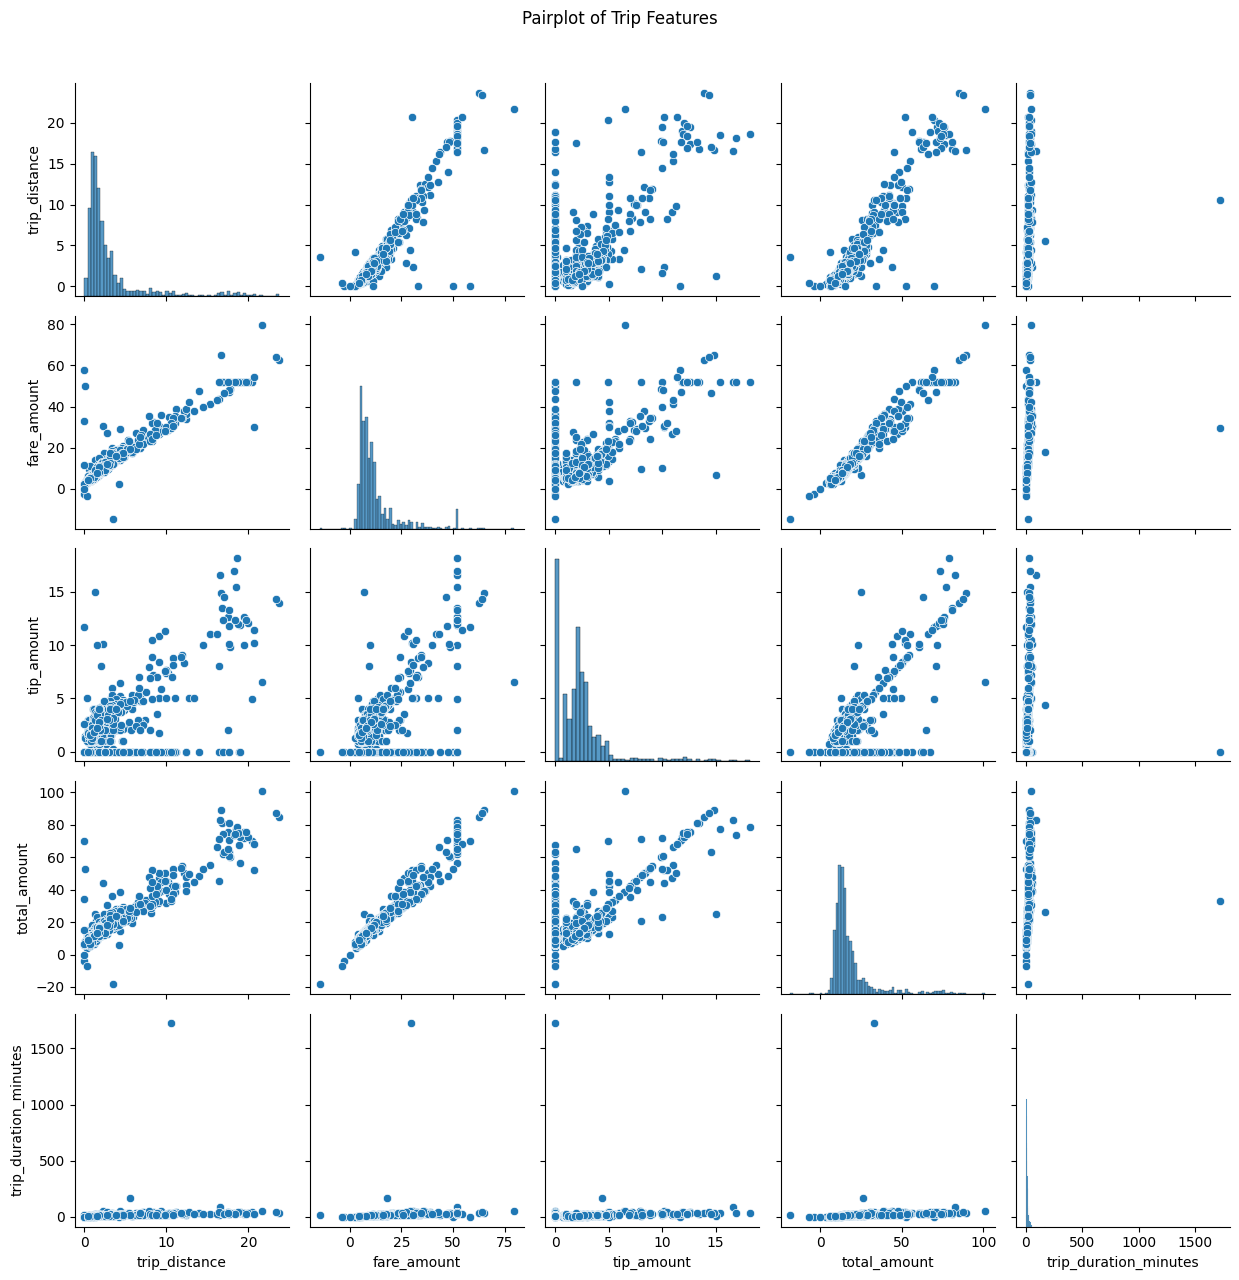

In [32]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.

# Sample the data
sample_df = df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_minutes']].sample(n=1000, random_state=42)

# Create a pairplot
sns.pairplot(sample_df)
plt.suptitle("Pairplot of Trip Features", y=1.02)
plt.tight_layout()
plt.show()

In [33]:
# Which variables appear to have a strong relationship? Which variables seem to have no relationship?

#fare_amount, total_amount, trip_distance have a strong relationship.
#trip_duration_minutes has no relationship with any variable.

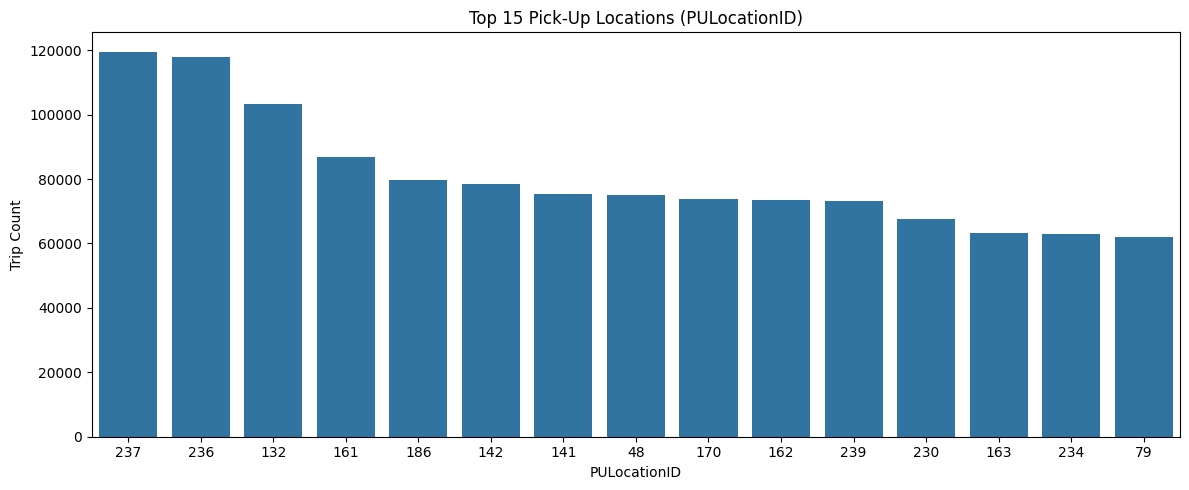

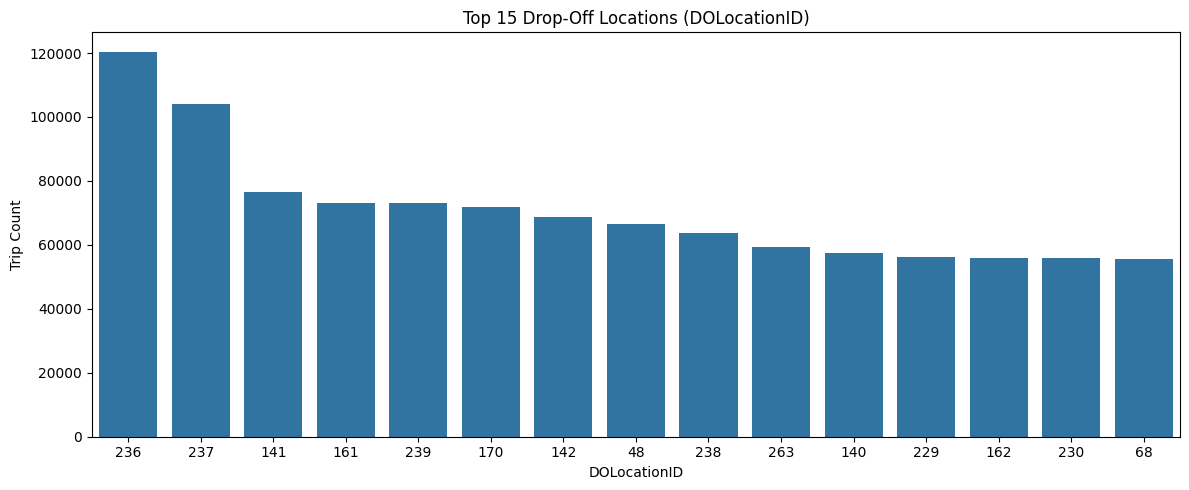

In [34]:
# Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.

# Get top 15 pickup locations
top_pu = df['PULocationID'].value_counts().nlargest(15).index
# Filter for top 15 only
df_top_pu = df[df['PULocationID'].isin(top_pu)]

# Plot for PULocationID
plt.figure(figsize=(12, 5))
sns.countplot(data=df_top_pu, x='PULocationID', order=top_pu)
plt.title('Top 15 Pick-Up Locations (PULocationID)')
plt.xlabel('PULocationID')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()

# Get top 15 dropoff locations
top_do = df['DOLocationID'].value_counts().nlargest(15).index
# Filter for top 15 only
df_top_do = df[df['DOLocationID'].isin(top_do)]

# Plot for DOLocationID
plt.figure(figsize=(12, 5))
sns.countplot(data=df_top_do, x='DOLocationID', order=top_do)
plt.title('Top 15 Drop-Off Locations (DOLocationID)')
plt.xlabel('DOLocationID')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()

In [35]:
# What's the most popular pick-up location?

# 237

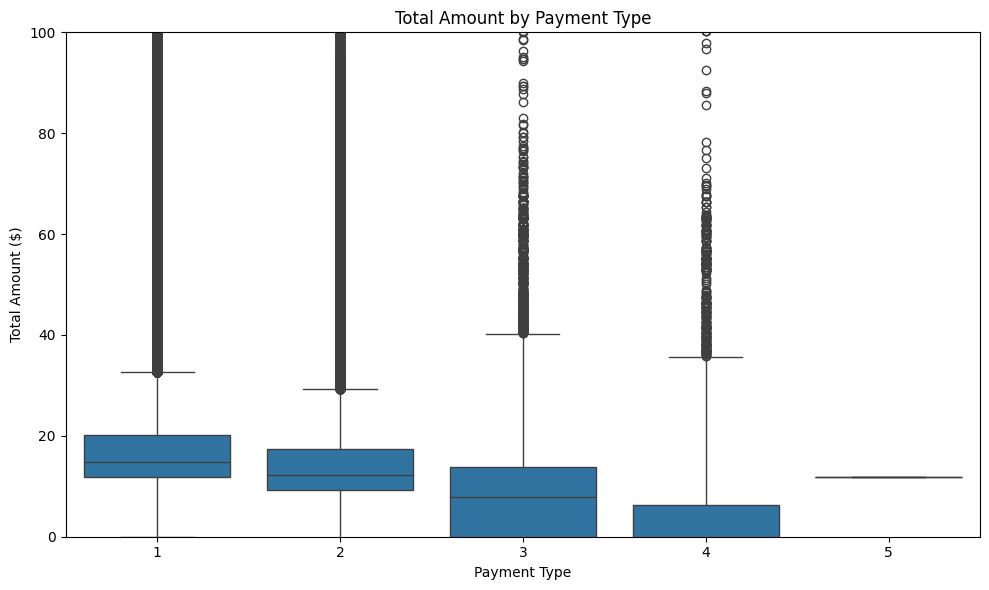

In [36]:
# Create a box plot of total amount by payment type. Do you see anything odd?

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_type', y='total_amount')

plt.title('Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount ($)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [37]:
# Does anything look weird? Can you explain what's going on?

#payment type 5 has the exact same total amount, with no variation for all trips. This is likely due to a placeholder default value.

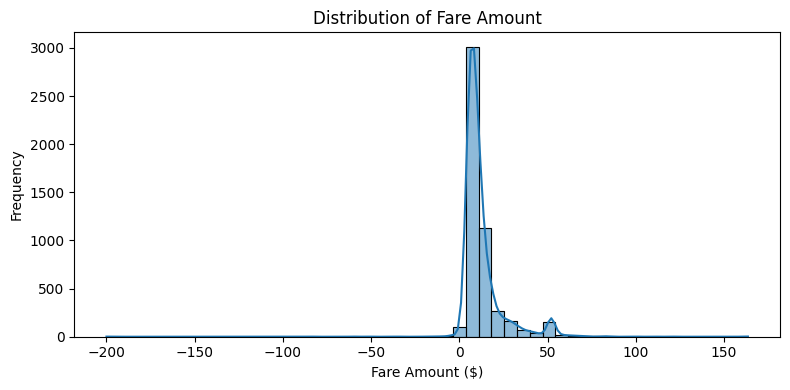

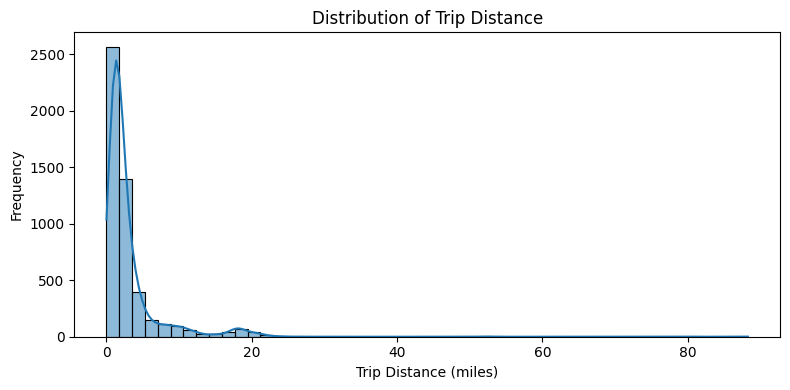

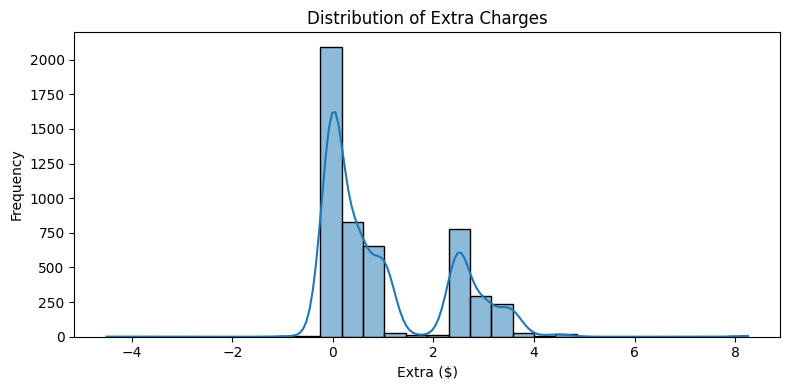

In [38]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot. Sample the data if you run into memory issues.

sample_df = df[['fare_amount', 'trip_distance', 'extra']].sample(n=5000, random_state=42)

# Plot for fare_amount
plt.figure(figsize=(8, 4))
sns.histplot(sample_df['fare_amount'], kde=True, bins=50)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot for trip_distance
plt.figure(figsize=(8, 4))
sns.histplot(sample_df['trip_distance'], kde=True, bins=50)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot for extra
plt.figure(figsize=(8, 4))
sns.histplot(sample_df['extra'], kde=True, bins=30)
plt.title('Distribution of Extra Charges')
plt.xlabel('Extra ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()